In [1]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Question 1:

In [65]:
# Obtaining necessary data

FederalData = pd.read_csv('C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW3\\Sdf16_1a.txt',sep="\t")
Disable_Data = pd.read_csv('C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW4\\ccd_lea_002089_1516_w_1a_011717_csv\\ccd_lea_002089_1516_w_1a_011717.csv')
RacialData = pd.read_csv('C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW4\\ccd_lea_052_1516_w_1a_011717_csv\\ccd_lea_052_1516_w_1a_011717.csv')
MathData = pd.read_csv('C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW3\\math-achievement-lea-sy2015-16.csv',sep=',')

C:\Users\saich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
FederalData = FederalData[FederalData.TFEDREV.notnull()]
FederalData = FederalData[FederalData.V33.notnull()]
FederalData = FederalData[FederalData.TFEDREV >= 0]
FederalData = FederalData[FederalData.V33 >= 0]

In [5]:
# Grouping by state name and summing up fed revenue and sorting in reverse 

FederalDataSub = FederalData.filter(['TFEDREV','STNAME','V33','LEAID'], axis=1)
FederalData_top = FederalDataSub.groupby(['STNAME']).sum().sort_values(by='TFEDREV', ascending=False).reset_index()

In [6]:
# What are the top ranking states

FederalData_top.head(5)

,STNAME,TFEDREV,V33
0,California,7621532000,6203660
1,Texas,5907429000,5299728
2,New York,3362525000,2591989
3,Florida,3147329000,2776933
4,Illinois,2122994000,2030075


In [7]:
# What is the funding per student

FederalData_top['FedFundPerStudent'] = FederalData_top['TFEDREV']/FederalData_top['V33']
FederalData_topState = FederalData_top.sort_values(by='FedFundPerStudent', ascending=False).reset_index()

<Figure size 1080x432 with 0 Axes>

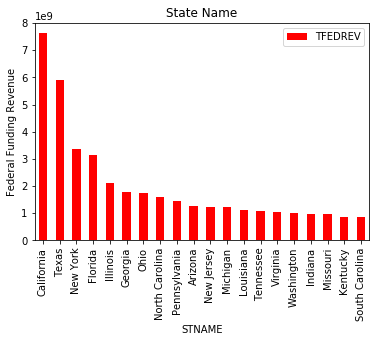

In [8]:
# Plotting federal funding revenue 
plt.figure(figsize=(15,6))
FederalData_top[:20].plot(kind='bar', y='TFEDREV', x='STNAME',color='red')
plt.ylabel("Federal Funding Revenue")
plt.title('State Name')
plt.show()

<Figure size 1080x432 with 0 Axes>

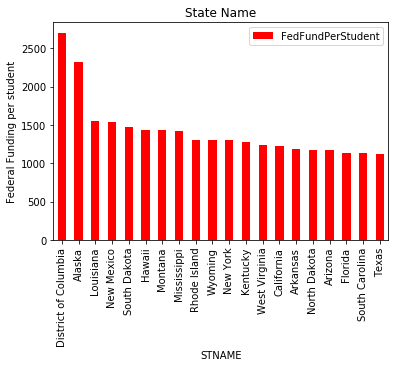

In [9]:
# Plotting federal funding per student 
plt.figure(figsize=(15,6))
FederalData_topState[:20].plot(kind='bar', y='FedFundPerStudent', x='STNAME',color='red')
plt.ylabel("Federal Funding per student")
plt.title('State Name')
plt.show()

In [10]:
# Question 2:

# Subsetting required rows
FederalDataState = FederalData.filter(['TOTALEXP','TOTALREV','STNAME','V33','LEAID'], axis=1)

In [11]:
# Sorting 

FederalDataState= FederalDataState[(FederalDataState[['TOTALEXP']] >= 0).all(axis=1)]
FederalDataState = FederalDataState[(FederalDataState[['TOTALREV']] >= 0).all(axis=1)]
FederalDataStateSum = FederalDataState.groupby(['LEAID'],as_index=False).sum().sort_values(by='TOTALREV', ascending=False)

In [12]:
FederalDataStateSum.head(5)

,LEAID,TOTALEXP,TOTALREV,V33
11903,3620580,29620098000,27448356000,981667
1577,622710,9686165000,10329380000,639337
8764,1709930,5963039000,5272668000,387311
8163,1200390,3654722000,3590773000,357579
4965,3200060,3081183000,3220684000,325990


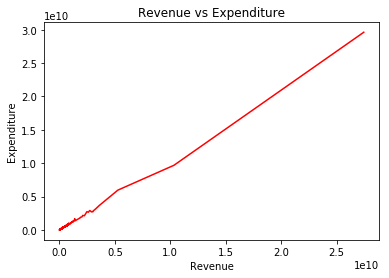

In [13]:
plt.plot(FederalDataStateSum['TOTALREV'],FederalDataStateSum['TOTALEXP'],COLOR = 'RED')
plt.ylabel('Expenditure')
plt.xlabel('Revenue')
plt.title('Revenue vs Expenditure')
plt.show()

In [14]:
FederalDataState1=FederalDataState.groupby(['STNAME'],as_index=False).sum().sort_values(by='TOTALREV', ascending=False)
FederalDataState1['DEBT_PERSTUDENT']=np.subtract(FederalDataState1['TOTALEXP'],FederalDataState1['TOTALREV'])/FederalDataState1['V33']
FederalDataState1=FederalDataState1.sort_values(by='DEBT_PERSTUDENT',axis=0, ascending=False)

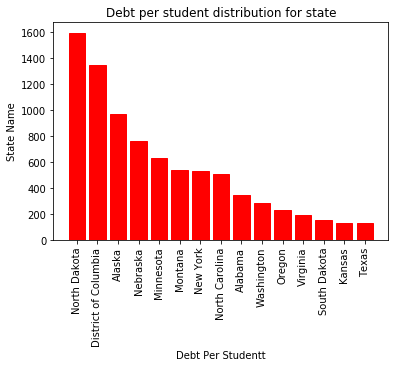

In [15]:
plt.bar(FederalDataState1['STNAME'][:15], FederalDataState1['DEBT_PERSTUDENT'][:15],COLOR = 'RED')
plt.ylabel('State Name')
plt.xlabel('Debt Per Studentt')
plt.title('Debt per student distribution for state')
plt.xticks(rotation=90)
plt.show()

In [26]:
LEAID = []
amount = []
value = 0
state = []
TotalRevenue = []

In [27]:
FederalDataSub4 = FederalData.filter(['TFEDREV','STNAME','LEAID','TOTALREV','TOTALEXP','TSTREV','TLOCREV'], axis=1)
HowMuchMoney = FederalDataSub4['TFEDREV'].sum()
FederalDataSub4['Extra'] = FederalDataSub4['TOTALREV'] - FederalDataSub4['TOTALEXP']
NeededRows = FederalDataSub4[FederalDataSub4['Extra']>=FederalDataSub4['TFEDREV']]

print(HowMuchMoney)
print(HowMuchMoney*0.85)

53226934000
45242893900.0


In [28]:
for j,k in NeededRows.iterrows(): 
    if value <= (HowMuchMoney*0.15):
        amount.append(k['TFEDREV'])
        TotalRevenue.append(k['TOTALREV'])
        LEAID.append(k['LEAID'])
        state.append(k['STNAME'])

        value = value + k['TFEDREV']

In [29]:
len(state)

5512

In [54]:
ProcessedData = pd.DataFrame({'LEAID':LEAID, 'STNAME':state, 'TotalRevenue':TotalRevenue, 'leaid': LEAID,'amount': amount}).sort_values('amount',ascending=False)
ProcessedDataNew = ProcessedData.groupby(['STNAME'],as_index=False).sum()
ProcessedDataNew['Propn'] = (ProcessedDataNew['amount']/ProcessedDataNew['TotalRevenue'])

In [75]:
ProcessedDataOld = ProcessedData
ProcessedDataOld['Propn'] = (ProcessedData['amount']/ProcessedData['TotalRevenue'])
ProcessedDataOld.sort_values(by='Propn', ascending=False)

,LEAID,STNAME,TotalRevenue,amount,leaid,Propn
201,400893,Arizona,1929000,621000,400893,0.321928
3717,3811850,North Dakota,6089000,1931000,3811850,0.317129
64,400190,Arizona,4590000,1213000,400190,0.264270
107,400332,Arizona,866000,197000,400332,0.227483
437,615510,California,67885000,14838000,615510,0.218576
109,400343,Arizona,2720000,582000,400343,0.213971
159,400788,Arizona,5894000,1260000,400788,0.213777
139,400649,Arizona,6746000,1375000,400649,0.203824
2012,2500557,Massachusetts,2144000,426000,2500557,0.198694
1872,2201170,Louisiana,523356000,102276000,2201170,0.195423


In [55]:
ProcessedDataNew.columns

Index(['STNAME', 'TotalRevenue', 'amount', 'Propn'], dtype='object')

In [56]:
ProcessedDataNew = ProcessedDataNew.sort_values(by='Propn', ascending=False)

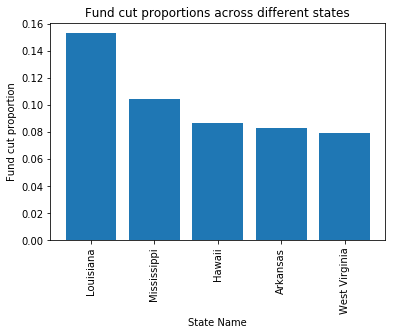

In [73]:
# Graph to display 

plt.bar(ProcessedDataNew['STNAME'][:5], ProcessedDataNew['Propn'][:5], align='center')
plt.ylabel('Fund cut proportion')
plt.xlabel('State Name')
plt.title('Fund cut proportions across different states')
plt.xticks(rotation=90)
plt.show()

In [58]:
# Question: 2:

In [59]:
ProcessedData.columns

Index(['LEAID', 'STNAME', 'TotalRevenue', 'amount', 'leaid'], dtype='object')

In [60]:
RacialData = RacialData[(RacialData['TOTAL'] >= 0)]
Racial = pd.DataFrame(RacialData['LEAID'])
RacialData['Hispanic'] = RacialData['HI'] / RacialData['TOTAL']
RacialData['Asian'] = RacialData['AS'] / RacialData['TOTAL']
RacialData['Two or More Races'] = RacialData['TR'] / RacialData['TOTAL']
RacialData['Hawaiian Native / Pacific Islander'] = RacialData['HP'] / RacialData['TOTAL']
RacialData['Black'] = RacialData['BL'] / RacialData['TOTAL']
RacialData['White'] = RacialData['WH'] / RacialData['TOTAL']
RacialData['American Indian/Alaska Native'] = RacialData['AM'] / RacialData['TOTAL']
RacialData = RacialData.fillna(0)
Racial = {'TR': 'Multi-Race','HP': 'Hawaiian or Pacific Islander','BL': 'Black or African American','HI': 'Hispanic/Latino', 'AS': 'Asian','AM': 'American Indian or Alaska Native','WH': 'White'}
Processed_Racial = RacialData.merge(ProcessedData,on=['LEAID'])
No_Processed_Racial=RacialData[(~RacialData.LEAID.isin(Processed_Racial.LEAID))]

C:\Users\saich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\saich\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


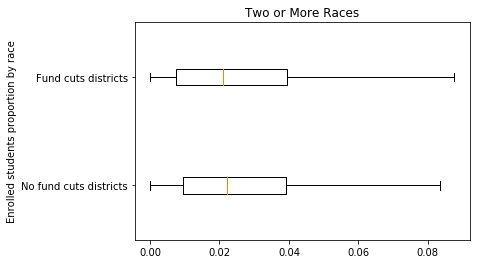

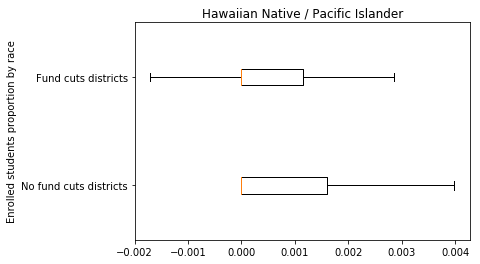

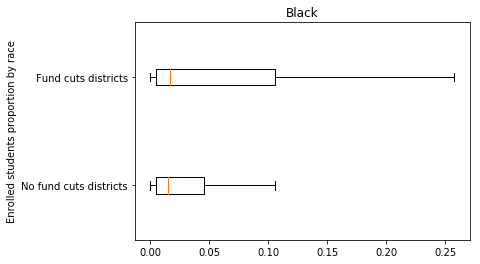

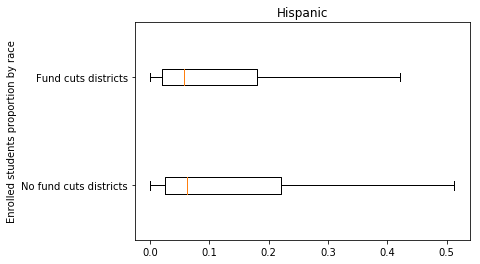

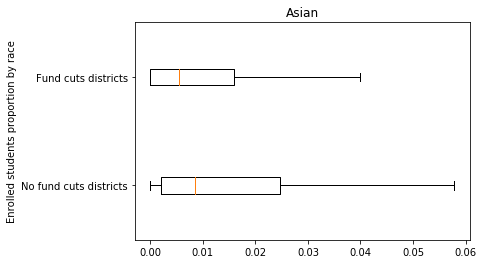

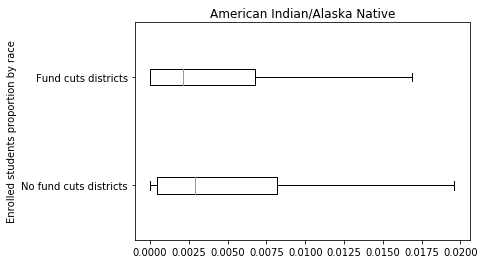

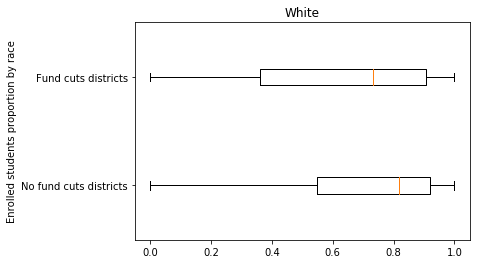

In [74]:
for Race in ['Two or More Races', 'Hawaiian Native / Pacific Islander', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native', 'White']:
    plt.boxplot([Processed_Racial[Race], No_Processed_Racial[Race]],showfliers=False,vert=False)
    plt.title(Race)
    plt.yticks([1, 2], ["No fund cuts districts", "Fund cuts districts"])
    plt.ylabel("Enrolled students proportion by race")
    plt.show()

In [66]:
# Filter required columns
Disable_Data = Disable_Data.filter(['STATENAME','LEAID','SPECED'], axis=1)
# Merge dataset with racial data
Disable_Data = Disable_Data.merge(RacialData,on=['LEAID'])
Disable_Data = Disable_Data[(Disable_Data[['SPECED']] > 0).all(axis=1)]
# Create a new variable for proportion
Disable_Data['Propn'] = (Disable_Data['SPECED']/ Disable_Data['TOTAL'])
# Disability fund cut dataset
Pro_Disable_Data = Disable_Data.merge(ProcessedData,on=['LEAID'])
# Disability no fund cut dataset
No_Pro_Disable_Data=Disable_Data[(~Disable_Data.LEAID.isin(Pro_Disable_Data.LEAID))]

C:\Users\saich\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


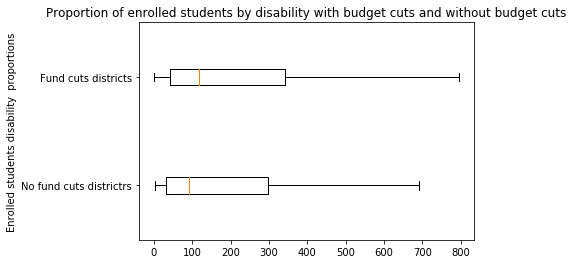

In [70]:
# Create a box plot to visualize the distributions of these proportions for districts

plt.boxplot([Pro_Disable_Data['SPECED'], No_Pro_Disable_Data['SPECED']],showfliers=False,vert=False)
plt.title('Proportion of enrolled students by disability with budget cuts and without budget cuts')
plt.yticks([1, 2], ["No fund cuts districtrs", "Fund cuts districts"])
plt.ylabel("Enrolled students disability  proportions")
plt.show()